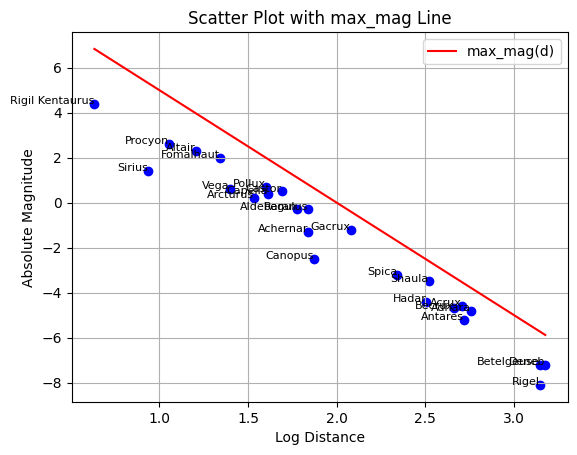

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
#1a
df = pd.read_csv('Star_Data.csv')
def max_mag(d):
    return 10 - (5 * math.log10(d))
name = df['Name']
df['log_distance'] = np.log10(df['Distance'])
distance = df['log_distance']
abs_mag = df['AbsMag']
distances = df['Distance']
d_values = np.linspace(min(distances), max(distances), 600)
max_mag_values = [max_mag(d) for d in d_values]
for i in range(len(name)):
    plt.text(distance[i], abs_mag[i], name[i], fontsize=8, ha='right')
plt.plot(np.log10(d_values), max_mag_values, color='red', label='max_mag(d)')
plt.scatter(distance, abs_mag, color='blue')
plt.grid(True)
plt.xlabel('Log Distance')
plt.ylabel('Absolute Magnitude')
plt.title('Scatter Plot with max_mag Line')
plt.legend()
plt.show()


In [36]:
#1c
x = max_mag(5)
x = x + 0.07
L_Lsun = 10 ** ((4.74 - x) / 2.5)
M_min = L_Lsun ** (1 / 3.5)

x, M_min

(6.5751499783199066, 0.6169764309397341)

In [38]:
#1d
alpha = 2.35
M_low = 0.2  
M_high = 10  

def salpeter_integral(M_min, M_max, alpha):
    return (M_max**(1 - alpha) - M_min**(1 - alpha)) / (1 - alpha)
M_min = 0.617
total_integral = salpeter_integral(M_low, M_high, alpha)
partial_integral = salpeter_integral(M_min, M_high, alpha)
fraction_greater_Mmin = partial_integral / total_integral
fraction_greater_Mmin

0.21453219151848868

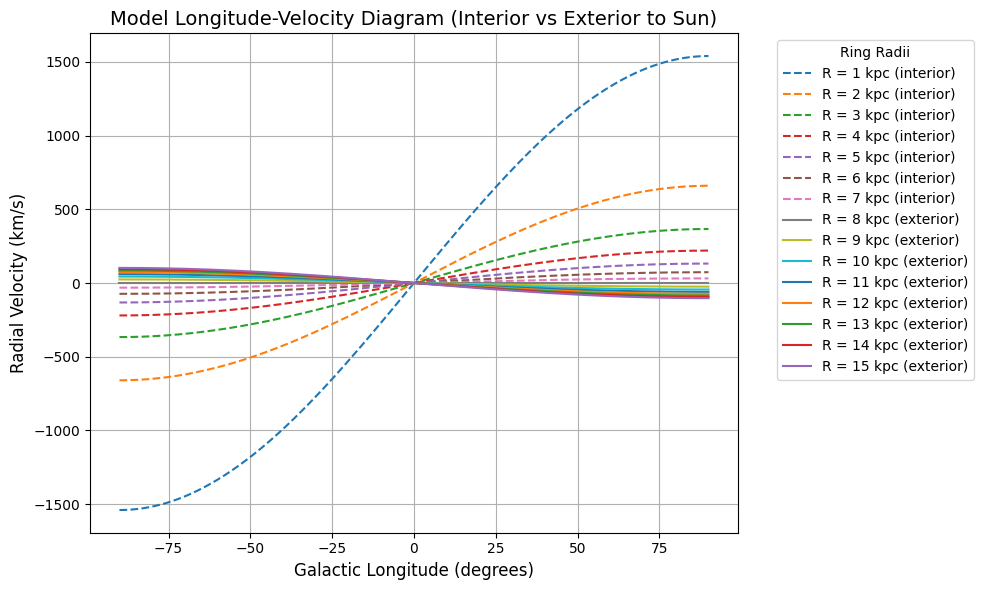

In [40]:
#2c
V_c = 220  
R_0 = 8  
radii = np.arange(1, 16, 1) 
longitudes = np.radians(np.linspace(-90, 90, 500))  

def radial_velocity(R, l):
    omega_R = V_c / R
    omega_R0 = V_c / R_0
    return R_0 * (omega_R - omega_R0) * np.sin(l)


plt.figure(figsize=(10, 6))

# Define colors or styles to differentiate interior/exterior to the Sun
for R in radii:
    v_r = radial_velocity(R, longitudes)
    if R < R_0: 
        plt.plot(np.degrees(longitudes), v_r, label=f'R = {R} kpc (interior)', linestyle='--')
    else:  
        plt.plot(np.degrees(longitudes), v_r, label=f'R = {R} kpc (exterior)', linestyle='-')

plt.xlabel('Galactic Longitude (degrees)', fontsize=12)
plt.ylabel('Radial Velocity (km/s)', fontsize=12)
plt.title('Model Longitude-Velocity Diagram (Interior vs Exterior to Sun)', fontsize=14)
plt.grid(True)
plt.legend(title="Ring Radii", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#2d
# The actual iamge discussed in class is far more complex than the model. In the model, I assumed 0 velocity, however in the real diagram, the 
# velocity is not 0, showed a more complex movement pattern in the real galaxy.Multiple velocity components: At a given longitude, especially 
# near l = 0, there are multiple velocity structures, which indicate the presence of multiple gas components at different distances along the line of sight.
#The model assumes smooth, symmetric curves around l = 0. but the observed diagram shows a sharp, dense concentration of velocity components near this region,
# indicating complex dynamics in the Galactic center, likely influenced by the bar or other non-axisymmetric structures.#

